In [1]:
from pyspark.context import SparkContext

sc = SparkContext('local', 'test')

from pyspark.sql import SQLContext

spark = SQLContext(sc)



In [20]:
df_train = spark.read.csv("movies_small.csv", header=True, inferSchema=True)

In [35]:
df_train.show(100)

+-----+------+-------+------+----------+--------------------+--------------------+
|  _c0|userId|movieId|rating| timestamp|               title|              genres|
+-----+------+-------+------+----------+--------------------+--------------------+
| 1626|   132|    260|   2.0|1157920586|Star Wars: Episod...|Action|Adventure|...|
| 1647|   198|    260|   5.0|1034137711|Star Wars: Episod...|Action|Adventure|...|
| 1655|   212|    260|   2.5|1505400094|Star Wars: Episod...|Action|Adventure|...|
| 1667|   234|    260|   5.0|1004407958|Star Wars: Episod...|Action|Adventure|...|
| 1684|   279|    260|   5.0|1506394310|Star Wars: Episod...|Action|Adventure|...|
| 1688|   292|    260|   4.0|1039914974|Star Wars: Episod...|Action|Adventure|...|
| 1695|   307|    260|   3.5|1186160883|Star Wars: Episod...|Action|Adventure|...|
| 1738|   414|    260|   5.0| 961514667|Star Wars: Episod...|Action|Adventure|...|
| 1751|   448|    260|   5.0|1019124071|Star Wars: Episod...|Action|Adventure|...|
| 17

In [22]:
df_train.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(userId,IntegerType,true),StructField(movieId,IntegerType,true),StructField(rating,DoubleType,true),StructField(timestamp,IntegerType,true),StructField(title,StringType,true),StructField(genres,StringType,true)))

In [23]:
# cuantas películas vio el usuario 132
from pyspark.sql import functions as F

df_train.where(F.col("userId") == 132).count()

8

In [24]:
# rating promedio del usuario 132
df_train.where(F.col("userId") == 132).select(F.mean(F.col("rating"))).show()

+-----------+
|avg(rating)|
+-----------+
|      2.625|
+-----------+



In [34]:
df_train.where(F.col("userId") == 132).show()

+-----+------+-------+------+----------+--------------------+--------------------+
|  _c0|userId|movieId|rating| timestamp|               title|              genres|
+-----+------+-------+------+----------+--------------------+--------------------+
| 1626|   132|    260|   2.0|1157920586|Star Wars: Episod...|Action|Adventure|...|
| 7603|   132|   1210|   2.0|1157921254|Star Wars: Episod...|Action|Adventure|...|
|13887|   132|   2858|   4.5|1157922636|American Beauty (...|       Drama|Romance|
|18249|   132|    914|   3.0|1157923450| My Fair Lady (1964)|Comedy|Drama|Musi...|
|26520|   132|    410|   3.0|1157967526|Addams Family Val...|Children|Comedy|F...|
|31294|   132|    355|   2.0|1157923325|Flintstones, The ...|Children|Comedy|F...|
|34453|   132|   1784|   2.5|1157921506|As Good as It Get...|Comedy|Drama|Romance|
|58274|   132|    788|   2.0|1157922765|Nutty Professor, ...|Comedy|Fantasy|Ro...|
+-----+------+-------+------+----------+--------------------+--------------------+



In [26]:
# ¿Cuántas películas en común vieron los usuarios 573 y 198?

df_train.createOrReplaceTempView("movies")

In [27]:
spark.sql("""
select movieId,count(distinct userId) from movies where userId='573' or userId='198'
group by movieId
having count(distinct userId)>1
"""
).show()

+-------+----------------------+
|movieId|count(DISTINCT userId)|
+-------+----------------------+
|   1210|                     2|
|    316|                     2|
|   4011|                     2|
|   2858|                     2|
|    260|                     2|
+-------+----------------------+



In [28]:
spark.sql("""
select movieId,userId,rating from movies where movieId in ('1210','4011','2858','316','260')
and (userId='573' or userId='198') 
"""
).show()

+-------+------+------+
|movieId|userId|rating|
+-------+------+------+
|    260|   198|   5.0|
|    260|   573|   5.0|
|    316|   198|   5.0|
|    316|   573|   4.0|
|   1210|   198|   5.0|
|   1210|   573|   5.0|
|   2858|   198|   5.0|
|   2858|   573|   2.0|
|   4011|   198|   3.0|
|   4011|   573|   4.5|
+-------+------+------+



In [ ]:
+-------+------+-------+--------+
|movieId|userId|rating1|rating2 |
+-------+------+-------+--------+
|    260|   198|   5.0 | 5.0    |
|    316|   198|   5.0 | 4.0    |
|   1210|   198|   5.0 | 5.0    |
|   2858|   198|   5.0 | 2.0    |
|   4011|   198|   3.0 | 4.5    |
+-------+------+------+---------+

In [29]:
spark.sql("""
select m1.userId as base_user,m2.userId as sim_user,m1.movieId,m2.rating as sim_rating,m1.rating base_rating from movies m1 
join movies m2 on (m1.movieId=m2.movieId) 
where m1.userId='573'and m2.userId='198'
"""
).show()

+---------+--------+-------+----------+-----------+
|base_user|sim_user|movieId|sim_rating|base_rating|
+---------+--------+-------+----------+-----------+
|      573|     198|    260|       5.0|        5.0|
|      573|     198|    316|       5.0|        4.0|
|      573|     198|   1210|       5.0|        5.0|
|      573|     198|   2858|       5.0|        2.0|
|      573|     198|   4011|       3.0|        4.5|
+---------+--------+-------+----------+-----------+



In [30]:
spark.sql("""
select m1.userId as base_user,m2.userId as sim_user,m1.movieId,m2.rating as sim_rating,m1.rating base_rating from movies m1 
join movies m2 on (m1.movieId=m2.movieId) 
where m1.userId='573'and m2.userId='132'
"""
).show()

+---------+--------+-------+----------+-----------+
|base_user|sim_user|movieId|sim_rating|base_rating|
+---------+--------+-------+----------+-----------+
|      573|     132|    260|       2.0|        5.0|
|      573|     132|   1210|       2.0|        5.0|
|      573|     132|   2858|       4.5|        2.0|
|      573|     132|    788|       2.0|        4.5|
+---------+--------+-------+----------+-----------+



In [38]:
sim_df = spark.sql("""
select m1.userId as base_user,m2.userId as sim_user,m1.movieId,m2.rating as sim_rating,m1.rating base_rating from movies m1 
join movies m2 on (m1.movieId=m2.movieId) 
where m1.userId='573'and m2.userId='573'
"""
)


<AxesSubplot:xlabel='base_rating', ylabel='sim_rating'>

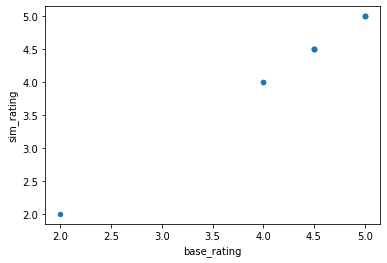

In [39]:
sim_df.toPandas()[['base_rating','sim_rating']].plot(kind='scatter', x='base_rating', y='sim_rating') 

In [47]:
sim_df = spark.sql("""
select m1.userId as base_user,m2.userId as sim_user,m1.movieId,m2.rating as sim_rating,m1.rating base_rating,pow((m1.rating-m2.rating),2) diff_sq from movies m1 
join movies m2 on (m1.movieId=m2.movieId) 
where m1.userId='599'and m2.userId='448'
"""
)
sim_df.show()


+---------+--------+-------+----------+-----------+-------+
|base_user|sim_user|movieId|sim_rating|base_rating|diff_sq|
+---------+--------+-------+----------+-----------+-------+
|      599|     448|    260|       5.0|        5.0|    0.0|
|      599|     448|    316|       3.0|        3.0|    0.0|
|      599|     448|   1210|       5.0|        5.0|    0.0|
|      599|     448|   2054|       4.0|        3.0|    1.0|
|      599|     448|   2858|       4.0|        5.0|    1.0|
|      599|     448|   2019|       5.0|        4.0|    1.0|
|      599|     448|    410|       4.0|        2.5|   2.25|
|      599|     448|     10|       4.0|        3.5|   0.25|
|      599|     448|     65|       1.0|        2.0|    1.0|
|      599|     448|    355|       2.0|        1.0|    1.0|
|      599|     448|   1101|       2.5|        2.5|    0.0|
|      599|     448|   1784|       4.0|        3.5|   0.25|
|      599|     448|   5989|       4.0|        3.0|    1.0|
|      599|     448|  72998|       3.0| 

<AxesSubplot:xlabel='base_rating', ylabel='sim_rating'>

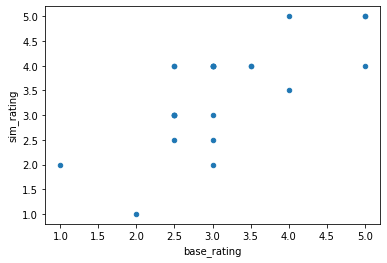

In [48]:
sim_df.toPandas()[['base_rating','sim_rating']].plot(kind='scatter', x='base_rating', y='sim_rating') 

In [67]:
sim_df = spark.sql("""
select m2.userId as sim_user,
       count(distinct m2.movieID) as movies_overlap,
       avg(pow((m1.rating-m2.rating),2)) as dist
from movies m1 
join movies m2 on (m1.movieId=m2.movieId) 
where m1.userId=573 and m2.userId<>m1.userId
group by m2.userId
having avg(pow((m1.rating-m2.rating),2))<=2 and count(distinct m2.movieID)>2
order by 3 asc
"""
)
sim_df.show(100)

+--------+--------------+------------------+
|sim_user|movies_overlap|              dist|
+--------+--------------+------------------+
|     234|             3|              0.75|
|     448|            11|1.2954545454545454|
|     292|             6|             1.375|
|     414|            12|            1.4375|
|     514|             4|               1.5|
|     480|             9|1.5277777777777777|
|     555|             6|1.9166666666666667|
+--------+--------------+------------------+



In [68]:
sim_df.createOrReplaceTempView("sim_users")

In [83]:
rec_df = spark.sql("""
select m.movieId,m.title,rating,dist,sim_user,1/(1+dist) as similarity,1/(1+dist)*rating weighted_raiting
from movies m 
join sim_users s
on (s.sim_user=m.userId)
order by title
"""
)
rec_df.show()

+-------+--------------------+------+------------------+--------+-------------------+------------------+
|movieId|               title|rating|              dist|sim_user|         similarity|  weighted_raiting|
+-------+--------------------+------+------------------+--------+-------------------+------------------+
|    410|Addams Family Val...|   4.0|1.9166666666666667|     555| 0.3428571428571428|1.3714285714285712|
|    410|Addams Family Val...|   3.5|1.5277777777777777|     480|0.39560439560439564|1.3846153846153848|
|    410|Addams Family Val...|   4.0|1.2954545454545454|     448|0.43564356435643564|1.7425742574257426|
|   1608|Air Force One (1997)|   3.0|            1.4375|     414|0.41025641025641024|1.2307692307692308|
|   1608|Air Force One (1997)|   3.0|1.2954545454545454|     448|0.43564356435643564| 1.306930693069307|
|   1608|Air Force One (1997)|   4.0|             1.375|     292|0.42105263157894735|1.6842105263157894|
|   1608|Air Force One (1997)|   3.0|1.9166666666666667

In [84]:
rec_df.createOrReplaceTempView('weighted_recom')

In [94]:
rec_movies_df = spark.sql("""
select title,sum(weighted_raiting)/sum(similarity) as expected_rating
from weighted_recom
group by title
order by 2 desc

""")

rec_movies_df.show()

+--------------------+------------------+
|               title|   expected_rating|
+--------------------+------------------+
|Seven Samurai (Sh...|               5.0|
|    Slap Shot (1977)|               5.0|
|Killing Fields, T...|               5.0|
|Star Wars: Episod...| 4.792110336888851|
|Star Wars: Episod...|  4.52484583167792|
|American Beauty (...| 4.379524370005922|
|     Fantasia (1940)| 4.263636363636364|
|        Mulan (1998)| 4.257284222100054|
|As Good as It Get...| 4.217275807852331|
|       Snatch (2000)| 4.171126431409207|
|Pineapple Express...|               4.0|
|Michael Collins (...|               4.0|
|Three O'Clock Hig...|               4.0|
|     Maverick (1994)|               4.0|
|      Contact (1997)|3.9415501905972046|
|Addams Family Val...|3.8315293943212985|
|Risky Business (1...|3.8294081601408356|
|   Black Swan (2010)|3.7424969987995196|
|Catch Me If You C...| 3.731437257747489|
|Trading Places (1...| 3.658313321219537|
+--------------------+------------

In [ ]:
p1  p2   py
0.3 0.4  0.2
7   6    4

pp = (0.3*7 + 0.4*6 + 0.2*4)/(0.3+0.4+0.2) 
